In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  выбор темы картинок на Ваш вкус. Необязательная строчка.
#  matplotlib.style.use('ggplot')
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

#  задаю рабочую папку
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_01/Ames_dataset")



In [2]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Полезные параметры:

#     sep -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
#     names -- список названий колонок, если он не задан в файле;
#     index_col -- номер колонки с индексом.
#     decimal -- символ-разделитель для знаков после запятой.
#          decimal=b',',

AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)


In [4]:
AH.head()

#  Есть еще
#  AH.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
#  Имена столбцов
AH.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
print(AH.shape)


(2930, 82)


In [7]:
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [8]:
#  можно выдавать только количественные или только категориальные
#  для количественных и категориальных разные описательные статистики
#  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

AH.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [9]:
#  Описательные статистики для
#  количественных переменных
AH.describe(include=[np.number])


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
#  Описательные статистики для
#  категориальных переменных
AH.describe(include=[np.object])


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [11]:
#  Описательные статистики для
#  части количественных переменных
#  Раньше все столбцы не вмещались на экран
#  Теперь рассматриваем только количественные переменные из первых 25 столбцов

AH.iloc[:, 0:25].describe(include=[np.number])



,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000


In [ ]:
#  разброс данных  
#  дисперсия
#  стандартное отклонение
#  разброс
#  IQR

In [12]:
#  Сконцентрируемся на результирующей переменной, на отклике SalePrice
#  Описательные статистики
AH['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
# асимметрия и эксцесс
# неустойчивы к выбросам еще сильнее, чем дисперсия
# не рекомендую, но часто встречаются в литературе

print("Асимметрия = ",  AH['SalePrice'].skew())
print("Эксцесс = ", AH['SalePrice'].kurt())


Асимметрия =  1.7435000757376466
Эксцесс =  5.118899951130896


In [14]:
figsize=(80, 60)

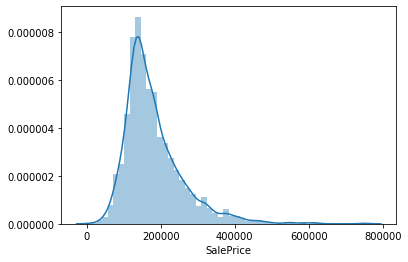

In [15]:
# гистограмма в seaborn
sns.distplot(AH['SalePrice']);


In [ ]:
#  print(plt.style.available)

In [ ]:
#  matplotlib.style.use('Solarize_Light2')

#  AH['SalePrice'].hist(bins=60, density=1);

In [16]:
#  гистограмма в pyplot
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

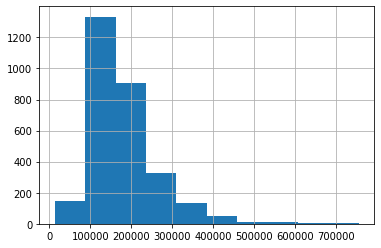

In [18]:
AH['SalePrice'].hist()

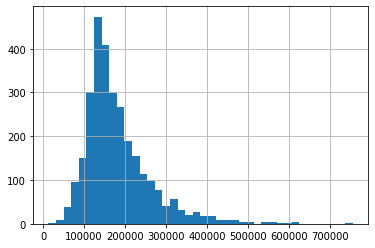

In [19]:
#  Задаем число столбцов
AH['SalePrice'].hist(bins=40)

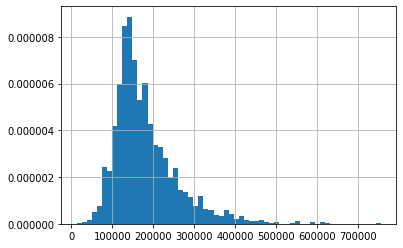

In [20]:
#  Заказываем вероятностную гистограмму
AH['SalePrice'].hist(bins=60, density=1)

In [21]:
#  print(plt.style.available)

In [22]:
#  matplotlib.style.use('tableau-colorblind10')

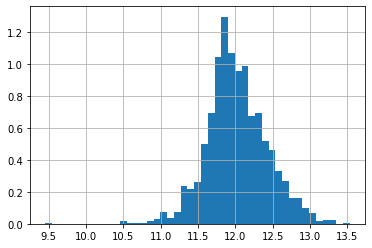

In [23]:
np.log(AH['SalePrice']).hist(bins=45, density=1);


### Ядерные оценки плотности

In [24]:
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist
#  отсутствует sheather jones bandwidth
#  присутствуют только Scott Silverman normal density reference

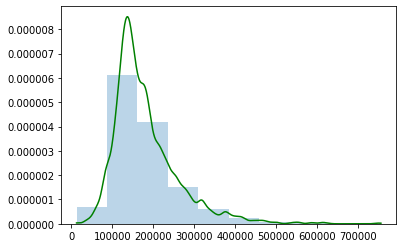

In [29]:
# создадим функцию
#  подбираем ширину окна
#  my_density = gaussian_kde(AH['SalePrice'])
#  my_density = gaussian_kde(AH['SalePrice'], bw_method = 5)
#  my_density = gaussian_kde(AH['SalePrice'], bw_method = 1)
my_density = gaussian_kde(AH['SalePrice'], bw_method =0.1)


# график ядерной оценки плотности
x = linspace(min(AH['SalePrice']), max(AH['SalePrice']),1000)
plot(x, my_density(x),'g')                    # оценка плотности

hist(AH['SalePrice'], density=1, alpha=.3)    # добавляем гистограмму
show()

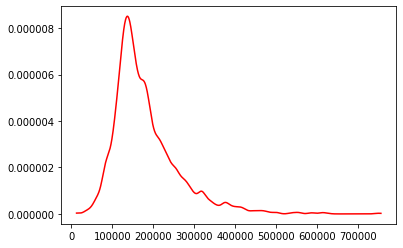

In [26]:
plot(x, my_density(x),'r') 


Сравнение гистограмм, ядерных оценок плотности и плотностей распределения
в конце скрипта  города России

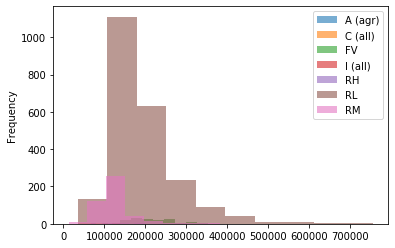

In [30]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
AH.groupby('MS Zoning')['SalePrice'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

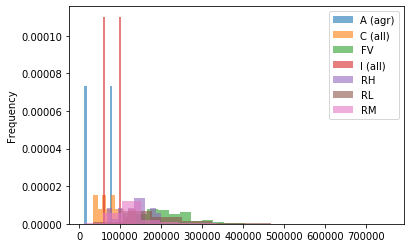

In [31]:
AH.groupby('MS Zoning')['SalePrice'].plot.hist(density=1, alpha=0.6)
# Добавляем легенду
plt.legend();

Text(0.5, 0.98, '')

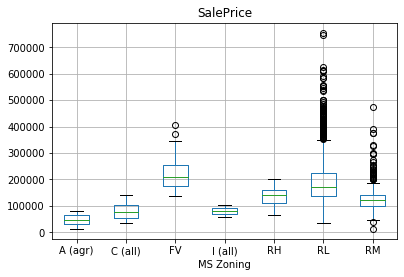

In [33]:
b_p = AH.boxplot(column='SalePrice', by='MS Zoning')
# Хак для того, чтобы исправить наезжающие заголовки графика
b_p.get_figure().suptitle('')




In [34]:
#  таблица частот

print (AH['MS Zoning'].value_counts())

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64


In [ ]:
#  Экспертно оцениваем следующие переменные как информативные

OverallQual
YearBuilt
TotalBsmtSF
GrLivArea


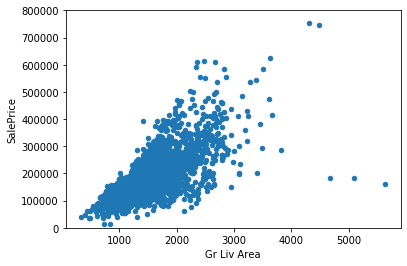

In [26]:
#  Диаграмма рассеивания grlivarea * saleprice
var = 'Gr Liv Area'
AH.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


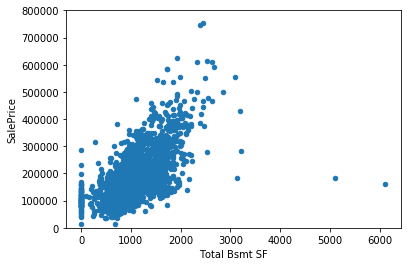

In [27]:
#  Диаграмма рассеивания  totalbsmtsf/saleprice
var = 'Total Bsmt SF'
AH.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


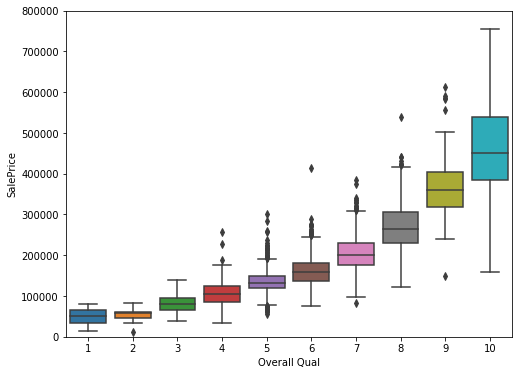

In [28]:
#  Ящики с усами
#  Как состояние дома влиет на цену?

var = 'Overall Qual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=AH[var], y=AH['SalePrice'])
fig.axis(ymin=0, ymax=800000);


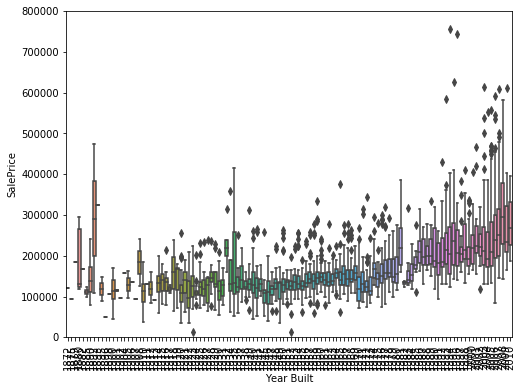

In [29]:
#  Ящики с усами
#  Как возраст дома влиет на цену?

var = 'Year Built'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=AH[var], y=AH['SalePrice'])
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


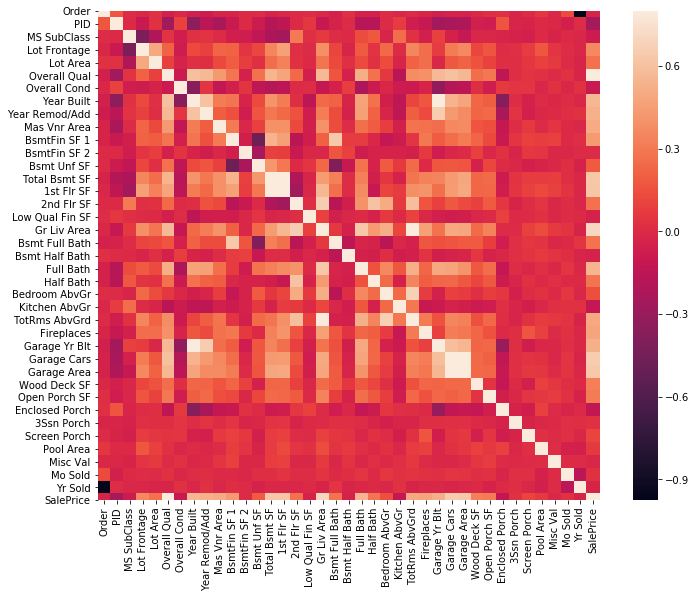

In [30]:
#  Матрица корреляций заменена на heatmap
#  Как исправить - 1-я и последняя строки только наполовину нарисована?

corrmat = AH.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


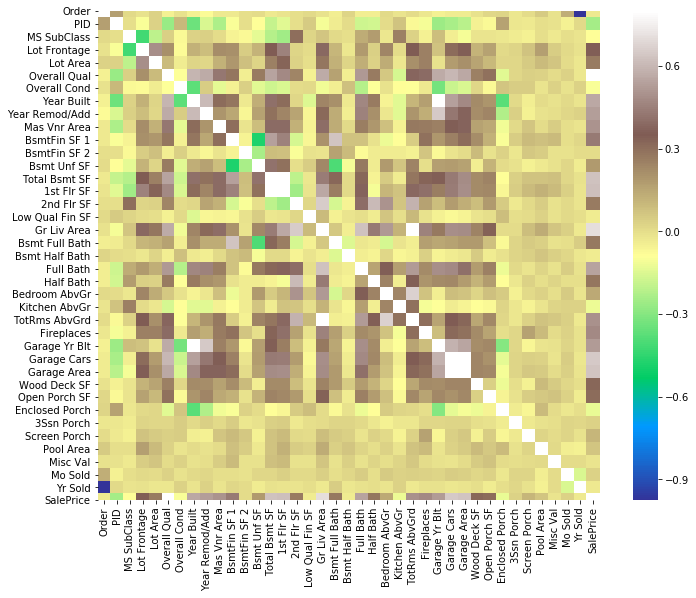

In [31]:
#  Матрица корреляций заменена на heatmap

#   Цветовая гамма как на географической карте  cmap='terrain'
#   Этот вариант нравится только мне...

#   https://seaborn.pydata.org/generated/seaborn.heatmap.html
#   https://matplotlib.org/2.0.1/users/colormaps.html
#   https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#   https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    
corrmat = AH.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='terrain')


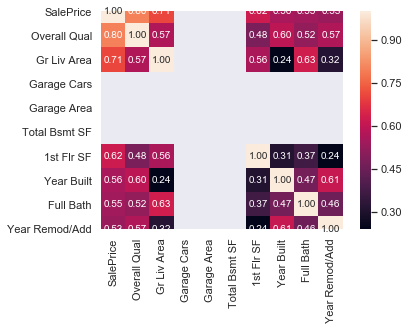

In [38]:

#   отобраны переменные, максимальная корреляция с  'SalePrice'
#   'SalePrice' correlation matrix (zoomed heatmap style)

#   Число отбираемых переменных
k = 10 

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(AH[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#   plt.show()


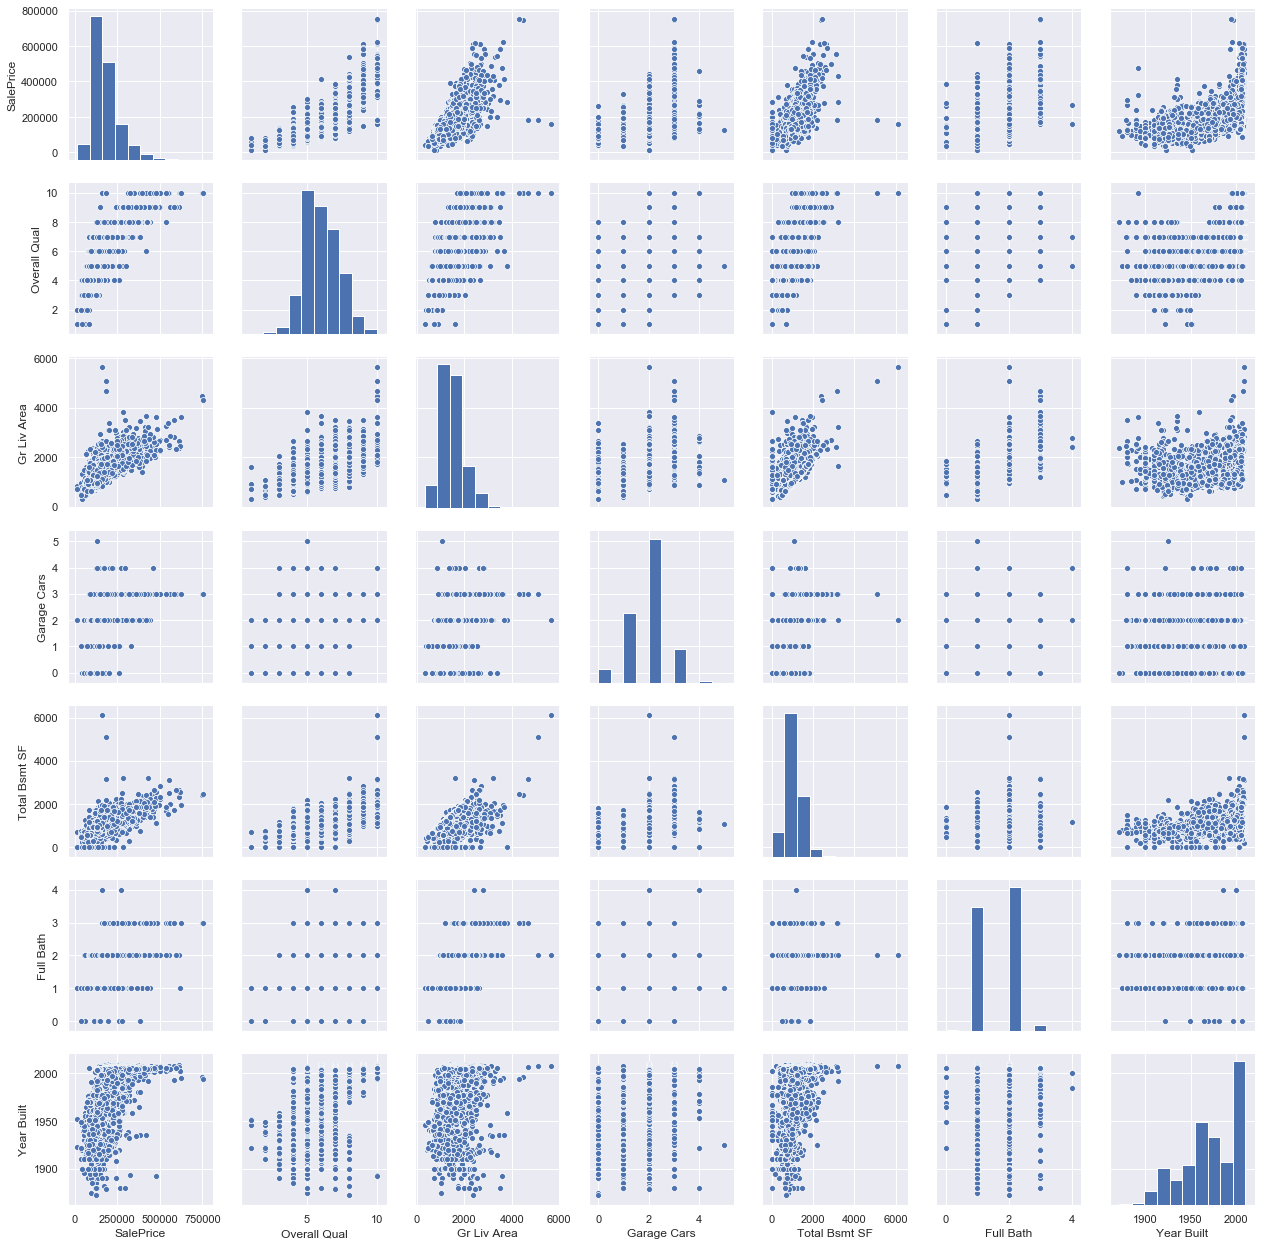

In [41]:
#  матрица диаграмм рассеивания
sns.set()
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Full Bath', 'Year Built']
sns.pairplot(AH[cols], size = 2.5)
#   plt.show();



In [42]:
#   выявление пропусков

total = AH.isnull().sum().sort_values(ascending=False)
percent = (AH.isnull().sum()/AH.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
Pool QC,2917,0.995563
Misc Feature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
Fireplace Qu,1422,0.485324
Lot Frontage,490,0.167235
Garage Qual,159,0.054266
Garage Yr Blt,159,0.054266
Garage Cond,159,0.054266
Garage Finish,159,0.054266


In [43]:
print(AH.shape)

(2930, 82)


In [ ]:
Выводы

Переменные 
Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, Lot Frontage
удаляем, так как 
1  они содержат много пропусков.
2  они не кажутся информативными для определения цены

Переменные 

Garage Qual	159	0.054266
Garage Yr Blt	159	0.054266
Garage Cond	159	0.054266
Garage Finish	159	0.054266
Garage Type	


'Garage Qual'
'Garage Yr Blt'
'Garage Cond',
'Garage Finish'
'Garage Type',  'Garage Cars', 'Garage Area', ,
       

In [10]:
Таблица сопряженности
Вопрос: совпадают ли пропуски у переменных 'Garage Qual' и 'Garage Yr Blt' ?

crosstab_1 = pd.crosstab(AH['Garage Qual'].isnull(), AH['Garage Yr Blt'].isnull(), margins = False)
print(crosstab_1)

Garage Yr Blt  False  True 
Garage Qual                
False           2771      0
True               0    159


In [ ]:
AH['Garage Qual'].isnull()

In [11]:
AH['Garage Qual'].head

<bound method NDFrame.head of 0        TA
1        TA
2        TA
3        TA
4        TA
       ... 
2925     TA
2926     TA
2927    NaN
2928     TA
2929     TA
Name: Garage Qual, Length: 2930, dtype: object>